# CNN

In [2]:
import tensorflow as tf
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [16]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',
    split=['train[:80%]', 'test[20%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='C:\\Users\\usuario\\Fer-Pc\\Escritorio\\EPN\\2024-A\\SEPTIMO_SEMESTRE\\RECUPERACION_DE_INFORMACION\\ir24a\\week14\\data',
    download= True,
)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00, 71.43 url/s] 
Extraction completed...: 0 file [00:00, ? file/s]
Extraction completed...: 100%|██████████| 9145/9145 [00:12<00:00, 731.42 file/s] 
                                                                        

Dataset caltech101 downloaded and prepared to C:\Users\usuario\Fer-Pc\Escritorio\EPN\2024-A\SEPTIMO_SEMESTRE\RECUPERACION_DE_INFORMACION\ir24a\week14\data\caltech101\3.0.2. Subsequent calls will reuse this data.


In [17]:
num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

In [18]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 35s 435ms/step - accuracy: 0.0173 - loss: 6.6335 - val_accuracy: 0.0635 - val_loss: 4.4992
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 31s 403ms/step - accuracy: 0.1004 - loss: 4.2124 - val_accuracy: 0.2344 - val_loss: 3.7989
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 385ms/step - accuracy: 0.5301 - loss: 2.2718 - val_accuracy: 0.3153 - val_loss: 3.9119
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 394ms/step - accuracy: 0.9138 - loss: 0.3999 - val_accuracy: 0.3359 - val_loss: 4.9104
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 396ms/step - accuracy: 0.9854 - loss: 0.1066 - val_accuracy: 0.3182 - val_loss: 4.8557
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 387ms/step - accuracy: 0.9975 - loss: 0.0314 - val_accuracy: 0.3426 - val_loss: 4.9013
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 392ms/step - accuracy: 0.9947 - loss: 0.0327 - val_accuracy: 0.3124 - val_loss: 5.4101
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 30s 388ms/step - accuracy: 0.9990 - loss: 0.0132 - val_accu

In [20]:
num_params = model.count_params()
print(f"Number of trainable parameters in the model: {num_params}")

Number of trainable parameters in the model: 23920550


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━

ValueError: num must be an integer with 1 <= num <= 25, not 26

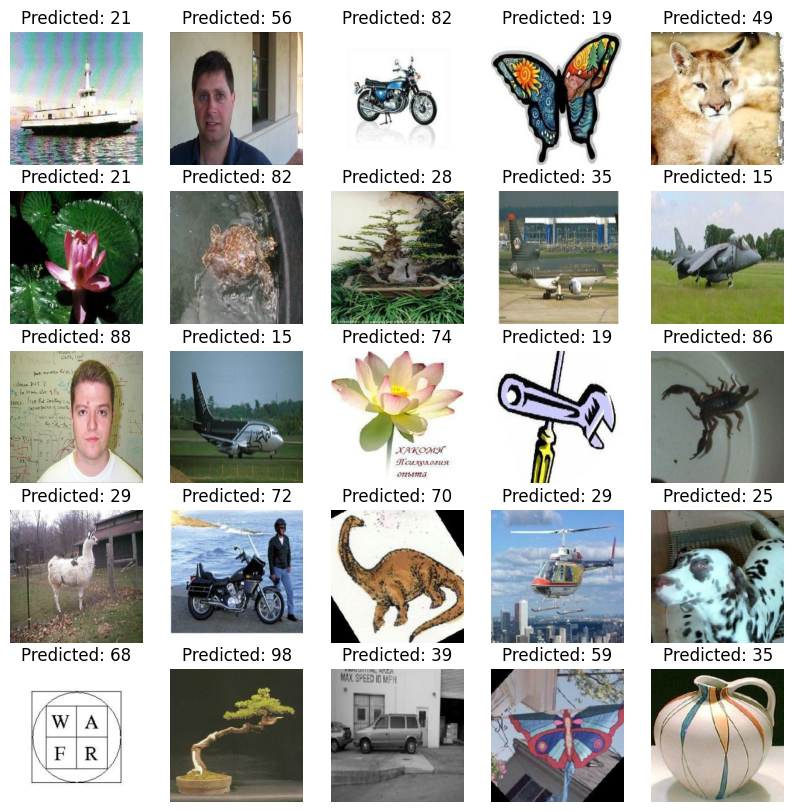

In [27]:
misclassified_images = []
misclassified_labels = []
for image, label in test_dataset:
    predictions = model.predict(image)
    predicted_label = np.argmax(predictions, axis=1)
    misclassified_idx = np.where(predicted_label != label.numpy())[0]
    for idx in misclassified_idx:
        misclassified_images.append(image[idx])
        misclassified_labels.append(predicted_label[idx])

plt.figure(figsize=(10, 10))
for i in range(len(misclassified_images)):
    plt.subplot(5, 5, i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"Predicted: {misclassified_labels[i]}")
    plt.axis('off')
plt.show()

In [25]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))
sample_image = sample_image[:1]

activation_model = models.Model(inputs=model.input,
                                outputs=[layer.output for layer in model.layers])
# activation_model = models.Model(inputs=model.input, outputs=model.layers[4].output)
activations = activation_model.predict(sample_image)

plt.figure(figsize=(10, 5))
for i, activation in enumerate(activations):
    plt.subplot(2, 4, i+1)
    try:
        plt.imshow(activation[0, :, :, 0], cmap='viridis')
    except:
        pass
    plt.title(f"Activation {i+1}")
    plt.axis('off')
plt.show()

ValueError: The layer sequential has never been called and thus has no defined input.

In [28]:
sample_image, _ = next(itertools.islice(iter(test_dataset), 0, 1))

102
